파이썬 머신러닝 완벽가이드 4장 실습 필사
파머완 4.8, 4.9장

**4.8 분류 실습 - 캐글 산탄데르 고객 만족 예측**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('/content/train.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (5374, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0.0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0.0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0.0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Columns: 371 entries, ID to TARGET
dtypes: float64(352), int64(19)
memory usage: 15.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0.0    5150
1.0     223
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,...,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5.373000e+03,5373.000000
mean,5376.770190,-741.492371,33.416636,66.273601,73.807363,128.213223,7.404099,14.322923,0.251210,0.468924,...,6.285483,2.364444,6.658599,5.177873,19.867566,3.684193,30.261563,22.991139,1.194094e+05,0.041504
std,3112.921659,27274.745975,12.957662,801.156242,338.611369,605.262788,163.361307,290.123921,13.100713,20.244266,...,287.809860,109.654291,301.197612,228.056330,765.353791,258.500153,1035.551588,793.632131,2.016119e+05,0.199471
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048518e+04,0.000000
25%,2645.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.803217e+04,0.000000
50%,5369.500000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.079613e+05,0.000000
75%,8072.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.211010e+05,0.000000
max,10773.000000,229.000000,102.000000,39000.000000,7904.220000,11073.570000,7904.220000,11073.570000,750.000000,960.000000,...,15265.950000,6643.290000,15458.220000,11959.170000,44990.490000,18928.590000,47617.080000,36988.200000,9.055272e+06,1.000000


In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

#피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치할 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(5374, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)\

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(4299, 369), 테스트 세트 Shape:(1075, 369)
학습 세트 레이블 값 분포 비율
TARGET
0.0    0.958585
1.0    0.041415
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0.0    0.95814
1.0    0.04186
Name: count, dtype: float64


**XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
#n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

#성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82778	validation_1-auc:nan
[1]	validation_0-auc:0.84177	validation_1-auc:nan
[2]	validation_0-auc:0.86773	validation_1-auc:nan
[3]	validation_0-auc:0.87548	validation_1-auc:nan
[4]	validation_0-auc:0.89577	validation_1-auc:nan
[5]	validation_0-auc:0.89816	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:13] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:14] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[6]	validation_0-auc:0.91611	validation_1-auc:nan
[7]	validation_0-auc:0.92486	validation_1-auc:nan
[8]	validation_0-auc:0.93696	validation_1-auc:nan
[9]	validation_0-auc:0.94394	validation_1-auc:nan
[10]	validation_0-auc:0.94905	validation_1-auc:nan
[11]	validation_0-auc:0.95201	validation_1-auc:nan
[12]	validation_0-auc:0.95446	validation_1-auc:nan
[13]	validation_0-auc:0.95819	validation_1-auc:nan
[14]	validation_0-auc:0.96016	validation_1-auc:nan
[15]	validation_0-auc:0.96198	validation_1-auc:nan
[16]	validation_0-auc:0.96464	validation_1-auc:nan
[17]	validation_0-auc:0.96800	validation_1-auc:nan
[18]	validation_0-auc:0.97053	validation_1-auc:nan
[19]	validation_0-auc:0.97133	validation_1-auc:nan
[20]	validation_0-auc:0.97202	validation_1-auc:nan
[21]	validation_0-auc:0.97308	validation_1-auc:nan
[22]	validation_0-auc:0.97420	validation_1-auc:nan
[23]	validation_0-auc:0.97493	validation_1-auc:nan
[24]	validation_0-auc:0.97550	validation_1-auc:nan
[25]	validation_0-auc:0.97586	valid

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:15] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[36]	validation_0-auc:0.98638	validation_1-auc:nan
[37]	validation_0-auc:0.98653	validation_1-auc:nan
[38]	validation_0-auc:0.98672	validation_1-auc:nan
[39]	validation_0-auc:0.98759	validation_1-auc:nan
[40]	validation_0-auc:0.98798	validation_1-auc:nan
[41]	validation_0-auc:0.98878	validation_1-auc:nan
[42]	validation_0-auc:0.98892	validation_1-auc:nan
[43]	validation_0-auc:0.98991	validation_1-auc:nan
[44]	validation_0-auc:0.99123	validation_1-auc:nan
[45]	validation_0-auc:0.99137	validation_1-auc:nan
[46]	validation_0-auc:0.99203	validation_1-auc:nan
[47]	validation_0-auc:0.99235	validation_1-auc:nan
[48]	validation_0-auc:0.99255	validation_1-auc:nan
[49]	validation_0-auc:0.99289	validation_1-auc:nan
[50]	validation_0-auc:0.99298	validation_1-auc:nan
[51]	validation_0-auc:0.99378	validation_1-auc:nan
[52]	validation_0-auc:0.99381	validation_1-auc:nan
[53]	validation_0-auc:0.99447	validation_1-auc:nan
[54]	validation_0-auc:0.99470	validation_1-auc:nan
[55]	validation_0-auc:0.99486	v

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:16] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[68]	validation_0-auc:0.99647	validation_1-auc:nan
[69]	validation_0-auc:0.99666	validation_1-auc:nan
[70]	validation_0-auc:0.99680	validation_1-auc:nan
[71]	validation_0-auc:0.99695	validation_1-auc:nan
[72]	validation_0-auc:0.99695	validation_1-auc:nan
[73]	validation_0-auc:0.99709	validation_1-auc:nan
[74]	validation_0-auc:0.99717	validation_1-auc:nan
[75]	validation_0-auc:0.99719	validation_1-auc:nan
[76]	validation_0-auc:0.99725	validation_1-auc:nan
[77]	validation_0-auc:0.99730	validation_1-auc:nan
[78]	validation_0-auc:0.99735	validation_1-auc:nan
[79]	validation_0-auc:0.99737	validation_1-auc:nan
[80]	validation_0-auc:0.99736	validation_1-auc:nan
[81]	validation_0-auc:0.99749	validation_1-auc:nan
[82]	validation_0-auc:0.99751	validation_1-auc:nan
[83]	validation_0-auc:0.99752	validation_1-auc:nan
[84]	validation_0-auc:0.99753	validation_1-auc:nan
[85]	validation_0-auc:0.99756	validation_1-auc:nan
[86]	validation_0-auc:0.99758	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:14:17] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[87]	validation_0-auc:0.99769	validation_1-auc:nan
[88]	validation_0-auc:0.99771	validation_1-auc:nan
[89]	validation_0-auc:0.99782	validation_1-auc:nan
[90]	validation_0-auc:0.99784	validation_1-auc:nan
[91]	validation_0-auc:0.99783	validation_1-auc:nan
[92]	validation_0-auc:0.99784	validation_1-auc:nan
[93]	validation_0-auc:0.99784	validation_1-auc:nan
[94]	validation_0-auc:0.99786	validation_1-auc:nan
[95]	validation_0-auc:0.99786	validation_1-auc:nan
[96]	validation_0-auc:0.99789	validation_1-auc:nan
[97]	validation_0-auc:0.99789	validation_1-auc:nan
[98]	validation_0-auc:0.99794	validation_1-auc:nan
[99]	validation_0-auc:0.99805	validation_1-auc:nan
ROC AUC: 0.7938


In [13]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth': [5, 7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0.75]}

#cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.79480	validation_1-auc:nan
[1]	validation_0-auc:0.81542	validation_1-auc:nan
[2]	validation_0-auc:0.81289	validation_1-auc:nan
[3]	validation_0-auc:0.80929	validation_1-auc:nan
[4]	validation_0-auc:0.84741	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:29] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.85258	validation_1-auc:nan
[6]	validation_0-auc:0.86100	validation_1-auc:nan
[7]	validation_0-auc:0.87046	validation_1-auc:nan
[8]	validation_0-auc:0.87502	validation_1-auc:nan
[9]	validation_0-auc:0.87578	validation_1-auc:nan
[10]	validation_0-auc:0.88118	validation_1-auc:nan
[11]	validation_0-auc:0.88124	validation_1-auc:nan
[12]	validation_0-auc:0.88010	validation_1-auc:nan
[13]	validation_0-auc:0.88556	validation_1-auc:nan
[14]	validation_0-auc:0.89074	validation_1-auc:nan
[15]	validation_0-auc:0.89527	validation_1-auc:nan
[16]	validation_0-auc:0.90178	validation_1-auc:nan
[17]	validation_0-auc:0.90065	validation_1-auc:nan
[18]	validation_0-auc:0.90002	validation_1-auc:nan
[19]	validation_0-auc:0.90486	validation_1-auc:nan
[20]	validation_0-auc:0.90527	validation_1-auc:nan
[21]	validation_0-auc:0.90764	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:30] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[22]	validation_0-auc:0.91158	validation_1-auc:nan
[23]	validation_0-auc:0.91233	validation_1-auc:nan
[24]	validation_0-auc:0.91233	validation_1-auc:nan
[25]	validation_0-auc:0.91251	validation_1-auc:nan
[26]	validation_0-auc:0.91570	validation_1-auc:nan
[27]	validation_0-auc:0.91593	validation_1-auc:nan
[28]	validation_0-auc:0.91501	validation_1-auc:nan
[29]	validation_0-auc:0.91700	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.78753	validation_1-auc:nan
[1]	validation_0-auc:0.80574	validation_1-auc:nan
[2]	validation_0-auc:0.82667	validation_1-auc:nan
[3]	validation_0-auc:0.83366	validation_1-auc:nan
[4]	validation_0-auc:0.85189	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:31] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.86008	validation_1-auc:nan
[6]	validation_0-auc:0.86389	validation_1-auc:nan
[7]	validation_0-auc:0.86968	validation_1-auc:nan
[8]	validation_0-auc:0.87250	validation_1-auc:nan
[9]	validation_0-auc:0.88245	validation_1-auc:nan
[10]	validation_0-auc:0.88642	validation_1-auc:nan
[11]	validation_0-auc:0.89182	validation_1-auc:nan
[12]	validation_0-auc:0.89461	validation_1-auc:nan
[13]	validation_0-auc:0.90167	validation_1-auc:nan
[14]	validation_0-auc:0.90505	validation_1-auc:nan
[15]	validation_0-auc:0.90920	validation_1-auc:nan
[16]	validation_0-auc:0.91239	validation_1-auc:nan
[17]	validation_0-auc:0.91195	validation_1-auc:nan
[18]	validation_0-auc:0.91297	validation_1-auc:nan
[19]	validation_0-auc:0.91617	validation_1-auc:nan
[20]	validation_0-auc:0.91508	validation_1-auc:nan
[21]	validation_0-auc:0.91640	validation_1-auc:nan
[22]	validation_0-auc:0.91730	validation_1-auc:nan
[23]	validation_0-auc:0.91758	validation_1-auc:nan
[24]	validation_0-auc:0.91690	valida

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:32] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[27]	validation_0-auc:0.91836	validation_1-auc:nan
[28]	validation_0-auc:0.91890	validation_1-auc:nan
[29]	validation_0-auc:0.91961	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.79291	validation_1-auc:0.74592
[1]	validation_0-auc:0.80784	validation_1-auc:0.75715
[2]	validation_0-auc:0.81359	validation_1-auc:0.76923
[3]	validation_0-auc:0.82063	validation_1-auc:0.75636
[4]	validation_0-auc:0.85710	validation_1-auc:0.82243
[5]	validation_0-auc:0.87310	validation_1-auc:0.85451
[6]	validation_0-auc:0.87631	validation_1-auc:0.85494
[7]	validation_0-auc:0.88653	validation_1-auc:0.85018
[8]	validation_0-auc:0.89087	validation_1-auc:0.85160
[9]	validation_0-auc:0.89312	validation_1-auc:0.85745
[10]	validation_0-auc:0.89307	validation_1-auc:0.85155
[11]	validation_0-auc:0.89904	validation_1-auc:0.86101
[12]	validation_0-auc:0.90166	validation_1-auc:0.85838
[13]	validation_0-auc:0.90350	validation_1-auc:0.85524
[14]	validation_0-auc:0.90359	validation_1-auc:0.85693
[15]	validation_0-auc:0.90327	validation_1-auc:0.85350
[16]	validation_0-auc:0.90303	validation_1-auc:0.85251
[17]	validation_0-auc:0.90328	validation_1-auc:0.85238
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.79884	validation_1-auc:nan
[1]	validation_0-auc:0.81748	validation_1-auc:nan
[2]	validation_0-auc:0.81463	validation_1-auc:nan
[3]	validation_0-auc:0.80887	validation_1-auc:nan
[4]	validation_0-auc:0.84236	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:34] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.85111	validation_1-auc:nan
[6]	validation_0-auc:0.85642	validation_1-auc:nan
[7]	validation_0-auc:0.86885	validation_1-auc:nan
[8]	validation_0-auc:0.87366	validation_1-auc:nan
[9]	validation_0-auc:0.87622	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:35] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[10]	validation_0-auc:0.88121	validation_1-auc:nan
[11]	validation_0-auc:0.88145	validation_1-auc:nan
[12]	validation_0-auc:0.88275	validation_1-auc:nan
[13]	validation_0-auc:0.88630	validation_1-auc:nan
[14]	validation_0-auc:0.89354	validation_1-auc:nan
[15]	validation_0-auc:0.89633	validation_1-auc:nan
[16]	validation_0-auc:0.89870	validation_1-auc:nan
[17]	validation_0-auc:0.89841	validation_1-auc:nan
[18]	validation_0-auc:0.89785	validation_1-auc:nan
[19]	validation_0-auc:0.89937	validation_1-auc:nan
[20]	validation_0-auc:0.90050	validation_1-auc:nan
[21]	validation_0-auc:0.90163	validation_1-auc:nan
[22]	validation_0-auc:0.90578	validation_1-auc:nan
[23]	validation_0-auc:0.90596	validation_1-auc:nan
[24]	validation_0-auc:0.90608	validation_1-auc:nan
[25]	validation_0-auc:0.90633	validation_1-auc:nan
[26]	validation_0-auc:0.90654	validation_1-auc:nan
[27]	validation_0-auc:0.90632	validation_1-auc:nan
[28]	validation_0-auc:0.90674	validation_1-auc:nan
[29]	validation_0-auc:0.90705	v

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:36] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80130	validation_1-auc:nan
[1]	validation_0-auc:0.80859	validation_1-auc:nan
[2]	validation_0-auc:0.83515	validation_1-auc:nan
[3]	validation_0-auc:0.82870	validation_1-auc:nan
[4]	validation_0-auc:0.85540	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:36] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.86032	validation_1-auc:nan
[6]	validation_0-auc:0.86475	validation_1-auc:nan
[7]	validation_0-auc:0.86988	validation_1-auc:nan
[8]	validation_0-auc:0.87071	validation_1-auc:nan
[9]	validation_0-auc:0.88018	validation_1-auc:nan
[10]	validation_0-auc:0.88475	validation_1-auc:nan
[11]	validation_0-auc:0.88863	validation_1-auc:nan
[12]	validation_0-auc:0.88948	validation_1-auc:nan
[13]	validation_0-auc:0.89251	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:37] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[14]	validation_0-auc:0.89668	validation_1-auc:nan
[15]	validation_0-auc:0.90001	validation_1-auc:nan
[16]	validation_0-auc:0.90387	validation_1-auc:nan
[17]	validation_0-auc:0.90349	validation_1-auc:nan
[18]	validation_0-auc:0.90301	validation_1-auc:nan
[19]	validation_0-auc:0.90601	validation_1-auc:nan
[20]	validation_0-auc:0.90632	validation_1-auc:nan
[21]	validation_0-auc:0.90768	validation_1-auc:nan
[22]	validation_0-auc:0.90799	validation_1-auc:nan
[23]	validation_0-auc:0.90855	validation_1-auc:nan
[24]	validation_0-auc:0.90855	validation_1-auc:nan
[25]	validation_0-auc:0.90862	validation_1-auc:nan
[26]	validation_0-auc:0.90865	validation_1-auc:nan
[27]	validation_0-auc:0.90941	validation_1-auc:nan
[28]	validation_0-auc:0.90904	validation_1-auc:nan
[29]	validation_0-auc:0.90952	validation_1-auc:nan
[30]	validation_0-auc:0.90978	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.79763	validation_1-auc:0.74724
[1]	validation_0-auc:0.81134	validation_1-auc:0.76513
[2]	validation_0-auc:0.80951	validation_1-auc:0.78242
[3]	validation_0-auc:0.82166	validation_1-auc:0.75756
[4]	validation_0-auc:0.84898	validation_1-auc:0.81812
[5]	validation_0-auc:0.86271	validation_1-auc:0.84548
[6]	validation_0-auc:0.87075	validation_1-auc:0.84551
[7]	validation_0-auc:0.87602	validation_1-auc:0.83922
[8]	validation_0-auc:0.87906	validation_1-auc:0.83339
[9]	validation_0-auc:0.88223	validation_1-auc:0.83819
[10]	validation_0-auc:0.88380	validation_1-auc:0.83618
[11]	validation_0-auc:0.88694	validation_1-auc:0.84296
[12]	validation_0-auc:0.88886	validation_1-auc:0.84653
[13]	validation_0-auc:0.88959	validation_1-auc:0.84570
[14]	validation_0-auc:0.88859	validation_1-auc:0.84818
[15]	validation_0-auc:0.88843	validation_1-auc:0.85094
[16]	validation_0-auc:0.89071	validation_1-auc:0.85191
[17]	validation_0-auc:0.89273	validation_1-auc:0.85402
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80402	validation_1-auc:nan
[1]	validation_0-auc:0.82854	validation_1-auc:nan
[2]	validation_0-auc:0.83393	validation_1-auc:nan
[3]	validation_0-auc:0.82540	validation_1-auc:nan
[4]	validation_0-auc:0.86264	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:43] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.86839	validation_1-auc:nan
[6]	validation_0-auc:0.87730	validation_1-auc:nan
[7]	validation_0-auc:0.88927	validation_1-auc:nan
[8]	validation_0-auc:0.88957	validation_1-auc:nan
[9]	validation_0-auc:0.89023	validation_1-auc:nan
[10]	validation_0-auc:0.89740	validation_1-auc:nan
[11]	validation_0-auc:0.89997	validation_1-auc:nan
[12]	validation_0-auc:0.89832	validation_1-auc:nan
[13]	validation_0-auc:0.90102	validation_1-auc:nan
[14]	validation_0-auc:0.90266	validation_1-auc:nan
[15]	validation_0-auc:0.90683	validation_1-auc:nan
[16]	validation_0-auc:0.91367	validation_1-auc:nan
[17]	validation_0-auc:0.91322	validation_1-auc:nan
[18]	validation_0-auc:0.91515	validation_1-auc:nan
[19]	validation_0-auc:0.91912	validation_1-auc:nan
[20]	validation_0-auc:0.92109	validation_1-auc:nan
[21]	validation_0-auc:0.92265	validation_1-auc:nan
[22]	validation_0-auc:0.92403	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:44] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[23]	validation_0-auc:0.92576	validation_1-auc:nan
[24]	validation_0-auc:0.92634	validation_1-auc:nan
[25]	validation_0-auc:0.92753	validation_1-auc:nan
[26]	validation_0-auc:0.92763	validation_1-auc:nan
[27]	validation_0-auc:0.92771	validation_1-auc:nan
[28]	validation_0-auc:0.92811	validation_1-auc:nan
[29]	validation_0-auc:0.92906	validation_1-auc:nan
[30]	validation_0-auc:0.92838	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80265	validation_1-auc:nan
[1]	validation_0-auc:0.82349	validation_1-auc:nan
[2]	validation_0-auc:0.84580	validation_1-auc:nan
[3]	validation_0-auc:0.85081	validation_1-auc:nan
[4]	validation_0-auc:0.87050	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:45] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.87730	validation_1-auc:nan
[6]	validation_0-auc:0.88342	validation_1-auc:nan
[7]	validation_0-auc:0.89086	validation_1-auc:nan
[8]	validation_0-auc:0.89490	validation_1-auc:nan
[9]	validation_0-auc:0.90230	validation_1-auc:nan
[10]	validation_0-auc:0.90282	validation_1-auc:nan
[11]	validation_0-auc:0.90534	validation_1-auc:nan
[12]	validation_0-auc:0.90595	validation_1-auc:nan
[13]	validation_0-auc:0.91048	validation_1-auc:nan
[14]	validation_0-auc:0.91234	validation_1-auc:nan
[15]	validation_0-auc:0.91517	validation_1-auc:nan
[16]	validation_0-auc:0.91671	validation_1-auc:nan
[17]	validation_0-auc:0.91654	validation_1-auc:nan
[18]	validation_0-auc:0.91696	validation_1-auc:nan
[19]	validation_0-auc:0.91969	validation_1-auc:nan
[20]	validation_0-auc:0.91957	validation_1-auc:nan
[21]	validation_0-auc:0.91993	validation_1-auc:nan
[22]	validation_0-auc:0.92169	validation_1-auc:nan
[23]	validation_0-auc:0.92229	validation_1-auc:nan
[24]	validation_0-auc:0.92239	valida

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:46] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[26]	validation_0-auc:0.92444	validation_1-auc:nan
[27]	validation_0-auc:0.92410	validation_1-auc:nan
[28]	validation_0-auc:0.92379	validation_1-auc:nan
[29]	validation_0-auc:0.92610	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80619	validation_1-auc:0.73393
[1]	validation_0-auc:0.82256	validation_1-auc:0.77235
[2]	validation_0-auc:0.81720	validation_1-auc:0.77887
[3]	validation_0-auc:0.84098	validation_1-auc:0.75394
[4]	validation_0-auc:0.87133	validation_1-auc:0.80710
[5]	validation_0-auc:0.88930	validation_1-auc:0.82865
[6]	validation_0-auc:0.89639	validation_1-auc:0.83714
[7]	validation_0-auc:0.90017	validation_1-auc:0.83221
[8]	validation_0-auc:0.90428	validation_1-auc:0.83633
[9]	validation_0-auc:0.90699	validation_1-auc:0.84507
[10]	validation_0-auc:0.90745	validation_1-auc:0.84698
[11]	validation_0-auc:0.91017	validation_1-auc:0.85355
[12]	validation_0-auc:0.91115	validation_1-auc:0.85273
[13]	validation_0-auc:0.91199	validation_1-auc:0.85069
[14]	validation_0-auc:0.91237	validation_1-auc:0.85151
[15]	validation_0-auc:0.91196	validation_1-auc:0.85174
[16]	validation_0-auc:0.91308	validation_1-auc:0.85141
[17]	validation_0-auc:0.91392	validation_1-auc:0.84748
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80152	validation_1-auc:nan
[1]	validation_0-auc:0.82286	validation_1-auc:nan
[2]	validation_0-auc:0.82273	validation_1-auc:nan
[3]	validation_0-auc:0.81994	validation_1-auc:nan
[4]	validation_0-auc:0.85438	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:49] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.86692	validation_1-auc:nan
[6]	validation_0-auc:0.87283	validation_1-auc:nan
[7]	validation_0-auc:0.88508	validation_1-auc:nan
[8]	validation_0-auc:0.89094	validation_1-auc:nan
[9]	validation_0-auc:0.88989	validation_1-auc:nan
[10]	validation_0-auc:0.89133	validation_1-auc:nan
[11]	validation_0-auc:0.88874	validation_1-auc:nan
[12]	validation_0-auc:0.88851	validation_1-auc:nan
[13]	validation_0-auc:0.89182	validation_1-auc:nan
[14]	validation_0-auc:0.89519	validation_1-auc:nan
[15]	validation_0-auc:0.90097	validation_1-auc:nan
[16]	validation_0-auc:0.90560	validation_1-auc:nan
[17]	validation_0-auc:0.90589	validation_1-auc:nan
[18]	validation_0-auc:0.90752	validation_1-auc:nan
[19]	validation_0-auc:0.91097	validation_1-auc:nan
[20]	validation_0-auc:0.91179	validation_1-auc:nan
[21]	validation_0-auc:0.91203	validation_1-auc:nan
[22]	validation_0-auc:0.91457	validation_1-auc:nan
[23]	validation_0-auc:0.91643	validation_1-auc:nan
[24]	validation_0-auc:0.91709	valida

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:50] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[27]	validation_0-auc:0.91827	validation_1-auc:nan
[28]	validation_0-auc:0.91792	validation_1-auc:nan
[29]	validation_0-auc:0.91912	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80701	validation_1-auc:nan
[1]	validation_0-auc:0.82278	validation_1-auc:nan
[2]	validation_0-auc:0.84277	validation_1-auc:nan
[3]	validation_0-auc:0.84179	validation_1-auc:nan
[4]	validation_0-auc:0.86538	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:50] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:51] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.87072	validation_1-auc:nan
[6]	validation_0-auc:0.87283	validation_1-auc:nan
[7]	validation_0-auc:0.87572	validation_1-auc:nan
[8]	validation_0-auc:0.87557	validation_1-auc:nan
[9]	validation_0-auc:0.88627	validation_1-auc:nan
[10]	validation_0-auc:0.89139	validation_1-auc:nan
[11]	validation_0-auc:0.89479	validation_1-auc:nan
[12]	validation_0-auc:0.89629	validation_1-auc:nan
[13]	validation_0-auc:0.89926	validation_1-auc:nan
[14]	validation_0-auc:0.90021	validation_1-auc:nan
[15]	validation_0-auc:0.90371	validation_1-auc:nan
[16]	validation_0-auc:0.90570	validation_1-auc:nan
[17]	validation_0-auc:0.90610	validation_1-auc:nan
[18]	validation_0-auc:0.90647	validation_1-auc:nan
[19]	validation_0-auc:0.90746	validation_1-auc:nan
[20]	validation_0-auc:0.90806	validation_1-auc:nan
[21]	validation_0-auc:0.91036	validation_1-auc:nan
[22]	validation_0-auc:0.91072	validation_1-auc:nan
[23]	validation_0-auc:0.90991	validation_1-auc:nan
[24]	validation_0-auc:0.91019	valida

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:52] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[30]	validation_0-auc:0.91387	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80373	validation_1-auc:0.73631
[1]	validation_0-auc:0.81538	validation_1-auc:0.74532
[2]	validation_0-auc:0.81612	validation_1-auc:0.76685
[3]	validation_0-auc:0.82939	validation_1-auc:0.74961
[4]	validation_0-auc:0.85478	validation_1-auc:0.78663
[5]	validation_0-auc:0.86465	validation_1-auc:0.81804
[6]	validation_0-auc:0.87716	validation_1-auc:0.82395
[7]	validation_0-auc:0.88461	validation_1-auc:0.80906
[8]	validation_0-auc:0.89117	validation_1-auc:0.81325
[9]	validation_0-auc:0.88944	validation_1-auc:0.81883
[10]	validation_0-auc:0.88998	validation_1-auc:0.82038
[11]	validation_0-auc:0.89285	validation_1-auc:0.82970
[12]	validation_0-auc:0.89508	validation_1-auc:0.82845
[13]	validation_0-auc:0.89404	validation_1-auc:0.82742
[14]	validation_0-auc:0.89509	validation_1-auc:0.83272
[15]	validation_0-auc:0.89515	validation_1-auc:0.83496
[16]	validation_0-auc:0.89494	validation_1-auc:0.83478
[17]	validation_0-auc:0.89550	validation_1-auc:0.83618
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82183	validation_1-auc:nan
[1]	validation_0-auc:0.83878	validation_1-auc:nan
[2]	validation_0-auc:0.84565	validation_1-auc:nan
[3]	validation_0-auc:0.84986	validation_1-auc:nan
[4]	validation_0-auc:0.85359	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:57] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.85698	validation_1-auc:nan
[6]	validation_0-auc:0.87156	validation_1-auc:nan
[7]	validation_0-auc:0.87280	validation_1-auc:nan
[8]	validation_0-auc:0.88097	validation_1-auc:nan
[9]	validation_0-auc:0.88252	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:58] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[10]	validation_0-auc:0.88828	validation_1-auc:nan
[11]	validation_0-auc:0.89328	validation_1-auc:nan
[12]	validation_0-auc:0.89840	validation_1-auc:nan
[13]	validation_0-auc:0.89937	validation_1-auc:nan
[14]	validation_0-auc:0.90385	validation_1-auc:nan
[15]	validation_0-auc:0.90597	validation_1-auc:nan
[16]	validation_0-auc:0.91066	validation_1-auc:nan
[17]	validation_0-auc:0.91127	validation_1-auc:nan
[18]	validation_0-auc:0.91245	validation_1-auc:nan
[19]	validation_0-auc:0.91278	validation_1-auc:nan
[20]	validation_0-auc:0.91223	validation_1-auc:nan
[21]	validation_0-auc:0.91302	validation_1-auc:nan
[22]	validation_0-auc:0.91362	validation_1-auc:nan
[23]	validation_0-auc:0.91517	validation_1-auc:nan
[24]	validation_0-auc:0.91546	validation_1-auc:nan
[25]	validation_0-auc:0.91552	validation_1-auc:nan
[26]	validation_0-auc:0.91643	validation_1-auc:nan
[27]	validation_0-auc:0.91696	validation_1-auc:nan
[28]	validation_0-auc:0.91632	validation_1-auc:nan
[29]	validation_0-auc:0.91832	v

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:59] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80789	validation_1-auc:nan
[1]	validation_0-auc:0.81702	validation_1-auc:nan
[2]	validation_0-auc:0.83040	validation_1-auc:nan
[3]	validation_0-auc:0.83984	validation_1-auc:nan
[4]	validation_0-auc:0.84848	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:19:59] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.85589	validation_1-auc:nan
[6]	validation_0-auc:0.86014	validation_1-auc:nan
[7]	validation_0-auc:0.87923	validation_1-auc:nan
[8]	validation_0-auc:0.88727	validation_1-auc:nan
[9]	validation_0-auc:0.89330	validation_1-auc:nan
[10]	validation_0-auc:0.89671	validation_1-auc:nan
[11]	validation_0-auc:0.89936	validation_1-auc:nan
[12]	validation_0-auc:0.90115	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:00] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[13]	validation_0-auc:0.90300	validation_1-auc:nan
[14]	validation_0-auc:0.90432	validation_1-auc:nan
[15]	validation_0-auc:0.90798	validation_1-auc:nan
[16]	validation_0-auc:0.90906	validation_1-auc:nan
[17]	validation_0-auc:0.91254	validation_1-auc:nan
[18]	validation_0-auc:0.91370	validation_1-auc:nan
[19]	validation_0-auc:0.91401	validation_1-auc:nan
[20]	validation_0-auc:0.91434	validation_1-auc:nan
[21]	validation_0-auc:0.91456	validation_1-auc:nan
[22]	validation_0-auc:0.91522	validation_1-auc:nan
[23]	validation_0-auc:0.91468	validation_1-auc:nan
[24]	validation_0-auc:0.91439	validation_1-auc:nan
[25]	validation_0-auc:0.91472	validation_1-auc:nan
[26]	validation_0-auc:0.91494	validation_1-auc:nan
[27]	validation_0-auc:0.91466	validation_1-auc:nan
[28]	validation_0-auc:0.91475	validation_1-auc:nan
[29]	validation_0-auc:0.91591	validation_1-auc:nan
[30]	validation_0-auc:0.91663	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:01] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81074	validation_1-auc:0.71209
[1]	validation_0-auc:0.85509	validation_1-auc:0.79061
[2]	validation_0-auc:0.86322	validation_1-auc:0.82387
[3]	validation_0-auc:0.86961	validation_1-auc:0.83460
[4]	validation_0-auc:0.87686	validation_1-auc:0.83992
[5]	validation_0-auc:0.88404	validation_1-auc:0.84548
[6]	validation_0-auc:0.88739	validation_1-auc:0.85366
[7]	validation_0-auc:0.89479	validation_1-auc:0.84967
[8]	validation_0-auc:0.89973	validation_1-auc:0.84838
[9]	validation_0-auc:0.90075	validation_1-auc:0.85327
[10]	validation_0-auc:0.90150	validation_1-auc:0.85234
[11]	validation_0-auc:0.90054	validation_1-auc:0.85135
[12]	validation_0-auc:0.90073	validation_1-auc:0.85085
[13]	validation_0-auc:0.90186	validation_1-auc:0.85029
[14]	validation_0-auc:0.90421	validation_1-auc:0.85049
[15]	validation_0-auc:0.90506	validation_1-auc:0.84823
[16]	validation_0-auc:0.90499	validation_1-auc:0.84881
[17]	validation_0-auc:0.90650	validation_1-auc:0.84640
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81921	validation_1-auc:nan
[1]	validation_0-auc:0.82835	validation_1-auc:nan
[2]	validation_0-auc:0.83797	validation_1-auc:nan
[3]	validation_0-auc:0.84127	validation_1-auc:nan
[4]	validation_0-auc:0.84532	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:03] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.85423	validation_1-auc:nan
[6]	validation_0-auc:0.86536	validation_1-auc:nan
[7]	validation_0-auc:0.86953	validation_1-auc:nan
[8]	validation_0-auc:0.87501	validation_1-auc:nan
[9]	validation_0-auc:0.88199	validation_1-auc:nan
[10]	validation_0-auc:0.88625	validation_1-auc:nan
[11]	validation_0-auc:0.88786	validation_1-auc:nan
[12]	validation_0-auc:0.88963	validation_1-auc:nan
[13]	validation_0-auc:0.89470	validation_1-auc:nan
[14]	validation_0-auc:0.89751	validation_1-auc:nan
[15]	validation_0-auc:0.89857	validation_1-auc:nan
[16]	validation_0-auc:0.89949	validation_1-auc:nan
[17]	validation_0-auc:0.89921	validation_1-auc:nan
[18]	validation_0-auc:0.89888	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:04] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[19]	validation_0-auc:0.89896	validation_1-auc:nan
[20]	validation_0-auc:0.89781	validation_1-auc:nan
[21]	validation_0-auc:0.89854	validation_1-auc:nan
[22]	validation_0-auc:0.90102	validation_1-auc:nan
[23]	validation_0-auc:0.90220	validation_1-auc:nan
[24]	validation_0-auc:0.90393	validation_1-auc:nan
[25]	validation_0-auc:0.90339	validation_1-auc:nan
[26]	validation_0-auc:0.90417	validation_1-auc:nan
[27]	validation_0-auc:0.90345	validation_1-auc:nan
[28]	validation_0-auc:0.90466	validation_1-auc:nan
[29]	validation_0-auc:0.90530	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80818	validation_1-auc:nan
[1]	validation_0-auc:0.82619	validation_1-auc:nan
[2]	validation_0-auc:0.84294	validation_1-auc:nan
[3]	validation_0-auc:0.85114	validation_1-auc:nan
[4]	validation_0-auc:0.85250	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:05] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.85842	validation_1-auc:nan
[6]	validation_0-auc:0.85945	validation_1-auc:nan
[7]	validation_0-auc:0.87193	validation_1-auc:nan
[8]	validation_0-auc:0.87819	validation_1-auc:nan
[9]	validation_0-auc:0.88249	validation_1-auc:nan
[10]	validation_0-auc:0.88455	validation_1-auc:nan
[11]	validation_0-auc:0.88777	validation_1-auc:nan
[12]	validation_0-auc:0.88984	validation_1-auc:nan
[13]	validation_0-auc:0.89213	validation_1-auc:nan
[14]	validation_0-auc:0.89441	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:06] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[15]	validation_0-auc:0.89724	validation_1-auc:nan
[16]	validation_0-auc:0.89746	validation_1-auc:nan
[17]	validation_0-auc:0.89902	validation_1-auc:nan
[18]	validation_0-auc:0.89979	validation_1-auc:nan
[19]	validation_0-auc:0.89996	validation_1-auc:nan
[20]	validation_0-auc:0.89979	validation_1-auc:nan
[21]	validation_0-auc:0.90106	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:07] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[22]	validation_0-auc:0.90177	validation_1-auc:nan
[23]	validation_0-auc:0.90260	validation_1-auc:nan
[24]	validation_0-auc:0.90296	validation_1-auc:nan
[25]	validation_0-auc:0.90286	validation_1-auc:nan
[26]	validation_0-auc:0.90378	validation_1-auc:nan
[27]	validation_0-auc:0.90381	validation_1-auc:nan
[28]	validation_0-auc:0.90505	validation_1-auc:nan
[29]	validation_0-auc:0.90475	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:08] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.79292	validation_1-auc:0.73105
[1]	validation_0-auc:0.84601	validation_1-auc:0.80273
[2]	validation_0-auc:0.85833	validation_1-auc:0.79934
[3]	validation_0-auc:0.87009	validation_1-auc:0.82222
[4]	validation_0-auc:0.87322	validation_1-auc:0.82105
[5]	validation_0-auc:0.87648	validation_1-auc:0.82529
[6]	validation_0-auc:0.88147	validation_1-auc:0.83769
[7]	validation_0-auc:0.88388	validation_1-auc:0.84047
[8]	validation_0-auc:0.88311	validation_1-auc:0.84499
[9]	validation_0-auc:0.88360	validation_1-auc:0.84957
[10]	validation_0-auc:0.88273	validation_1-auc:0.84566
[11]	validation_0-auc:0.88336	validation_1-auc:0.84864
[12]	validation_0-auc:0.88451	validation_1-auc:0.84981
[13]	validation_0-auc:0.88681	validation_1-auc:0.85143
[14]	validation_0-auc:0.88807	validation_1-auc:0.85143
[15]	validation_0-auc:0.88783	validation_1-auc:0.84841
[16]	validation_0-auc:0.89471	validation_1-auc:0.84576
[17]	validation_0-auc:0.89338	validation_1-auc:0.84371
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82861	validation_1-auc:nan
[1]	validation_0-auc:0.84857	validation_1-auc:nan
[2]	validation_0-auc:0.85576	validation_1-auc:nan
[3]	validation_0-auc:0.86869	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:11] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[4]	validation_0-auc:0.87532	validation_1-auc:nan
[5]	validation_0-auc:0.88085	validation_1-auc:nan
[6]	validation_0-auc:0.89718	validation_1-auc:nan
[7]	validation_0-auc:0.89695	validation_1-auc:nan
[8]	validation_0-auc:0.90272	validation_1-auc:nan
[9]	validation_0-auc:0.91072	validation_1-auc:nan
[10]	validation_0-auc:0.91160	validation_1-auc:nan
[11]	validation_0-auc:0.91264	validation_1-auc:nan
[12]	validation_0-auc:0.91675	validation_1-auc:nan
[13]	validation_0-auc:0.91824	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:12] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[14]	validation_0-auc:0.92283	validation_1-auc:nan
[15]	validation_0-auc:0.92402	validation_1-auc:nan
[16]	validation_0-auc:0.92429	validation_1-auc:nan
[17]	validation_0-auc:0.92591	validation_1-auc:nan
[18]	validation_0-auc:0.92614	validation_1-auc:nan
[19]	validation_0-auc:0.92616	validation_1-auc:nan
[20]	validation_0-auc:0.92523	validation_1-auc:nan
[21]	validation_0-auc:0.92569	validation_1-auc:nan
[22]	validation_0-auc:0.92681	validation_1-auc:nan
[23]	validation_0-auc:0.92636	validation_1-auc:nan
[24]	validation_0-auc:0.92560	validation_1-auc:nan
[25]	validation_0-auc:0.92571	validation_1-auc:nan
[26]	validation_0-auc:0.92610	validation_1-auc:nan
[27]	validation_0-auc:0.92625	validation_1-auc:nan
[28]	validation_0-auc:0.92695	validation_1-auc:nan
[29]	validation_0-auc:0.92671	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:13] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81705	validation_1-auc:nan
[1]	validation_0-auc:0.82945	validation_1-auc:nan
[2]	validation_0-auc:0.85116	validation_1-auc:nan
[3]	validation_0-auc:0.86596	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:13] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[4]	validation_0-auc:0.87216	validation_1-auc:nan
[5]	validation_0-auc:0.87705	validation_1-auc:nan
[6]	validation_0-auc:0.87962	validation_1-auc:nan
[7]	validation_0-auc:0.89466	validation_1-auc:nan
[8]	validation_0-auc:0.89895	validation_1-auc:nan
[9]	validation_0-auc:0.90191	validation_1-auc:nan
[10]	validation_0-auc:0.90981	validation_1-auc:nan
[11]	validation_0-auc:0.90863	validation_1-auc:nan
[12]	validation_0-auc:0.91327	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:14] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[13]	validation_0-auc:0.91406	validation_1-auc:nan
[14]	validation_0-auc:0.91641	validation_1-auc:nan
[15]	validation_0-auc:0.91972	validation_1-auc:nan
[16]	validation_0-auc:0.91967	validation_1-auc:nan
[17]	validation_0-auc:0.91958	validation_1-auc:nan
[18]	validation_0-auc:0.92011	validation_1-auc:nan
[19]	validation_0-auc:0.91967	validation_1-auc:nan
[20]	validation_0-auc:0.91934	validation_1-auc:nan
[21]	validation_0-auc:0.92074	validation_1-auc:nan
[22]	validation_0-auc:0.92170	validation_1-auc:nan
[23]	validation_0-auc:0.92098	validation_1-auc:nan
[24]	validation_0-auc:0.92093	validation_1-auc:nan
[25]	validation_0-auc:0.92100	validation_1-auc:nan
[26]	validation_0-auc:0.92257	validation_1-auc:nan
[27]	validation_0-auc:0.92309	validation_1-auc:nan
[28]	validation_0-auc:0.92380	validation_1-auc:nan
[29]	validation_0-auc:0.92335	validation_1-auc:nan
[30]	validation_0-auc:0.92410	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:15] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81891	validation_1-auc:0.70738
[1]	validation_0-auc:0.87154	validation_1-auc:0.80093
[2]	validation_0-auc:0.88798	validation_1-auc:0.79791
[3]	validation_0-auc:0.89256	validation_1-auc:0.81881
[4]	validation_0-auc:0.89745	validation_1-auc:0.82745
[5]	validation_0-auc:0.90114	validation_1-auc:0.83203
[6]	validation_0-auc:0.90788	validation_1-auc:0.83634
[7]	validation_0-auc:0.91548	validation_1-auc:0.83319
[8]	validation_0-auc:0.91700	validation_1-auc:0.83601
[9]	validation_0-auc:0.91916	validation_1-auc:0.83792
[10]	validation_0-auc:0.92039	validation_1-auc:0.83277
[11]	validation_0-auc:0.92045	validation_1-auc:0.83154
[12]	validation_0-auc:0.92097	validation_1-auc:0.83036
[13]	validation_0-auc:0.92086	validation_1-auc:0.82825
[14]	validation_0-auc:0.92190	validation_1-auc:0.83485
[15]	validation_0-auc:0.92230	validation_1-auc:0.83434
[16]	validation_0-auc:0.92116	validation_1-auc:0.83121
[17]	validation_0-auc:0.91914	validation_1-auc:0.83022
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82713	validation_1-auc:nan
[1]	validation_0-auc:0.84455	validation_1-auc:nan
[2]	validation_0-auc:0.85397	validation_1-auc:nan
[3]	validation_0-auc:0.85826	validation_1-auc:nan
[4]	validation_0-auc:0.86321	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:17] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.86875	validation_1-auc:nan
[6]	validation_0-auc:0.88158	validation_1-auc:nan
[7]	validation_0-auc:0.88442	validation_1-auc:nan
[8]	validation_0-auc:0.88811	validation_1-auc:nan
[9]	validation_0-auc:0.89630	validation_1-auc:nan
[10]	validation_0-auc:0.90362	validation_1-auc:nan
[11]	validation_0-auc:0.90489	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:18] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[12]	validation_0-auc:0.90654	validation_1-auc:nan
[13]	validation_0-auc:0.90782	validation_1-auc:nan
[14]	validation_0-auc:0.91021	validation_1-auc:nan
[15]	validation_0-auc:0.91269	validation_1-auc:nan
[16]	validation_0-auc:0.91417	validation_1-auc:nan
[17]	validation_0-auc:0.91406	validation_1-auc:nan
[18]	validation_0-auc:0.91485	validation_1-auc:nan
[19]	validation_0-auc:0.91621	validation_1-auc:nan
[20]	validation_0-auc:0.91657	validation_1-auc:nan
[21]	validation_0-auc:0.91706	validation_1-auc:nan
[22]	validation_0-auc:0.91676	validation_1-auc:nan
[23]	validation_0-auc:0.91569	validation_1-auc:nan
[24]	validation_0-auc:0.91570	validation_1-auc:nan
[25]	validation_0-auc:0.91551	validation_1-auc:nan
[26]	validation_0-auc:0.91629	validation_1-auc:nan
[27]	validation_0-auc:0.91529	validation_1-auc:nan
[28]	validation_0-auc:0.91558	validation_1-auc:nan
[29]	validation_0-auc:0.91720	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:19] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81894	validation_1-auc:nan
[1]	validation_0-auc:0.83750	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:20] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[2]	validation_0-auc:0.85441	validation_1-auc:nan
[3]	validation_0-auc:0.87408	validation_1-auc:nan
[4]	validation_0-auc:0.87881	validation_1-auc:nan
[5]	validation_0-auc:0.88198	validation_1-auc:nan
[6]	validation_0-auc:0.88187	validation_1-auc:nan
[7]	validation_0-auc:0.88953	validation_1-auc:nan
[8]	validation_0-auc:0.89570	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:21] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[9]	validation_0-auc:0.89586	validation_1-auc:nan
[10]	validation_0-auc:0.89886	validation_1-auc:nan
[11]	validation_0-auc:0.90045	validation_1-auc:nan
[12]	validation_0-auc:0.90178	validation_1-auc:nan
[13]	validation_0-auc:0.90503	validation_1-auc:nan
[14]	validation_0-auc:0.90531	validation_1-auc:nan
[15]	validation_0-auc:0.90757	validation_1-auc:nan
[16]	validation_0-auc:0.90760	validation_1-auc:nan
[17]	validation_0-auc:0.90795	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:22] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[18]	validation_0-auc:0.90811	validation_1-auc:nan
[19]	validation_0-auc:0.90914	validation_1-auc:nan
[20]	validation_0-auc:0.91006	validation_1-auc:nan
[21]	validation_0-auc:0.91139	validation_1-auc:nan
[22]	validation_0-auc:0.91103	validation_1-auc:nan
[23]	validation_0-auc:0.91062	validation_1-auc:nan
[24]	validation_0-auc:0.91095	validation_1-auc:nan
[25]	validation_0-auc:0.91077	validation_1-auc:nan
[26]	validation_0-auc:0.91238	validation_1-auc:nan
[27]	validation_0-auc:0.91277	validation_1-auc:nan
[28]	validation_0-auc:0.91317	validation_1-auc:nan
[29]	validation_0-auc:0.91252	validation_1-auc:nan
[30]	validation_0-auc:0.91290	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:23] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.80098	validation_1-auc:0.73613
[1]	validation_0-auc:0.84932	validation_1-auc:0.79864
[2]	validation_0-auc:0.86809	validation_1-auc:0.78681
[3]	validation_0-auc:0.87629	validation_1-auc:0.80638
[4]	validation_0-auc:0.88116	validation_1-auc:0.80513
[5]	validation_0-auc:0.88318	validation_1-auc:0.81818
[6]	validation_0-auc:0.88797	validation_1-auc:0.81798
[7]	validation_0-auc:0.89541	validation_1-auc:0.81397
[8]	validation_0-auc:0.89674	validation_1-auc:0.81924
[9]	validation_0-auc:0.89731	validation_1-auc:0.82577
[10]	validation_0-auc:0.89885	validation_1-auc:0.82436
[11]	validation_0-auc:0.89825	validation_1-auc:0.82849
[12]	validation_0-auc:0.90021	validation_1-auc:0.83269
[13]	validation_0-auc:0.90253	validation_1-auc:0.83508
[14]	validation_0-auc:0.90540	validation_1-auc:0.83614
[15]	validation_0-auc:0.90550	validation_1-auc:0.84002
[16]	validation_0-auc:0.90648	validation_1-auc:0.84000
[17]	validation_0-auc:0.90775	validation_1-auc:0.84151
[18]	validation_0-au

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81792	validation_1-auc:nan
[1]	validation_0-auc:0.83558	validation_1-auc:nan
[2]	validation_0-auc:0.85160	validation_1-auc:nan
[3]	validation_0-auc:0.87191	validation_1-auc:nan
[4]	validation_0-auc:0.87917	validation_1-auc:nan
[5]	validation_0-auc:0.88272	validation_1-auc:nan
[6]	validation_0-auc:0.89563	validation_1-auc:nan


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:25] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:20:26] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


[7]	validation_0-auc:0.90879	validation_1-auc:nan
[8]	validation_0-auc:0.91381	validation_1-auc:nan
[9]	validation_0-auc:0.91909	validation_1-auc:nan
[10]	validation_0-auc:0.92103	validation_1-auc:nan
[11]	validation_0-auc:0.92533	validation_1-auc:nan
[12]	validation_0-auc:0.92792	validation_1-auc:nan
[13]	validation_0-auc:0.93070	validation_1-auc:nan
[14]	validation_0-auc:0.93210	validation_1-auc:nan
[15]	validation_0-auc:0.93382	validation_1-auc:nan
[16]	validation_0-auc:0.93700	validation_1-auc:nan
[17]	validation_0-auc:0.93827	validation_1-auc:nan
[18]	validation_0-auc:0.94135	validation_1-auc:nan
[19]	validation_0-auc:0.94363	validation_1-auc:nan
[20]	validation_0-auc:0.94441	validation_1-auc:nan
[21]	validation_0-auc:0.94560	validation_1-auc:nan
[22]	validation_0-auc:0.94817	validation_1-auc:nan
[23]	validation_0-auc:0.94940	validation_1-auc:nan
[24]	validation_0-auc:0.95016	validation_1-auc:nan
[25]	validation_0-auc:0.95187	validation_1-auc:nan
[26]	validation_0-auc:0.95277	vali

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

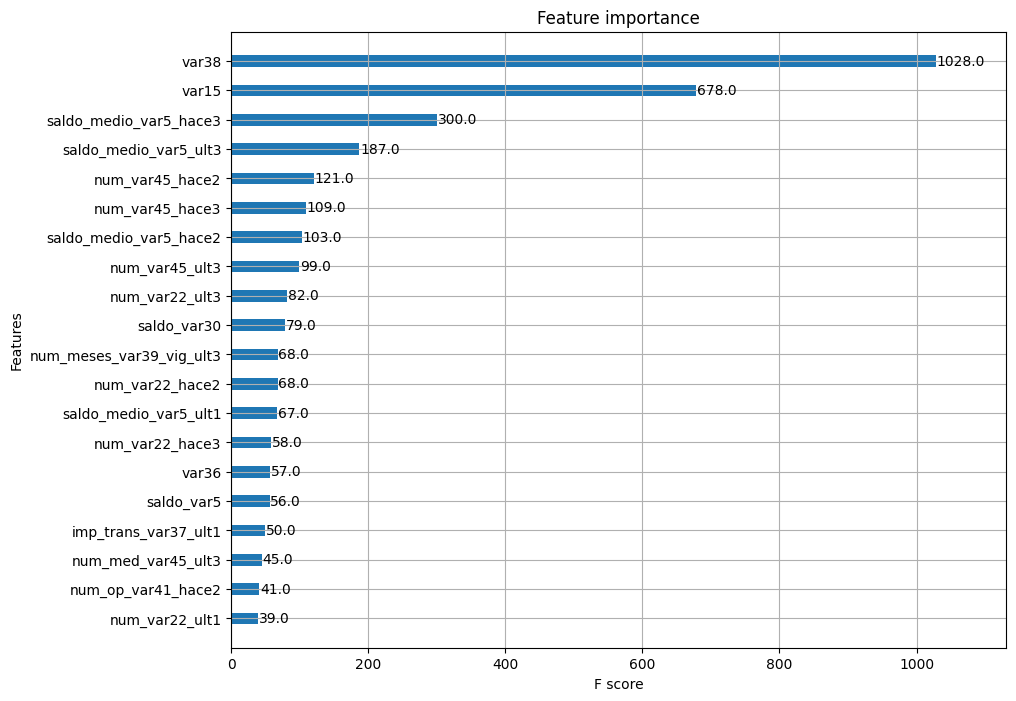

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

**LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

In [20]:
!pip install lightgbm==3.3.2

In [28]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="multi_logloss", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.205507
[2]	valid_0's multi_logloss: 0.15569
[3]	valid_0's multi_logloss: 0.152547
[4]	valid_0's multi_logloss: 0.150004
[5]	valid_0's multi_logloss: 0.149421
[6]	valid_0's multi_logloss: 0.149698
[7]	valid_0's multi_logloss: 0.148158
[8]	valid_0's multi_logloss: 0.146936
[9]	valid_0's multi_logloss: 0.146578
[10]	valid_0's multi_logloss: 0.146656
[11]	valid_0's multi_logloss: 0.146726
[12]	valid_0's multi_logloss: 0.146645
[13]	valid_0's multi_logloss: 0.146915
[14]	valid_0's multi_logloss: 0.147388
[15]	valid_0's multi_logloss: 0.147386
[16]	valid_0's multi_logloss: 0.147405
[17]	valid_0's multi_logloss: 0.147909
[18]	valid_0's multi_logloss: 0.14807
[19]	valid_0's multi_logloss: 0.148672
[20]	valid_0's multi_logloss: 0.148978
[21]	valid_0's multi_logloss: 0.149096
[22]	valid_0's multi_logloss: 0.149438
[23]	valid_0's multi_logloss: 0.14912
[24]	valid_0's multi_logloss: 0.149509
[25]	valid_0's multi_logloss: 0.149673
[26]	valid_0's multi_logloss: 0.15059

In [32]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
          'max_depth': [128, 160],
          'min_child_samples': [60, 100],
          'subsample': [0.8, 1]}

# Create GridSearchCV object
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3, scoring='roc_auc')

# Fit GridSearchCV
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

# Get the best model from GridSearchCV
best_lgbm_clf = gridcv.best_estimator_

# Predict and evaluate
lgbm_roc_score = roc_auc_score(y_test, best_lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'LGBMClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_valida

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC: 0.7820


In [34]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="multi_logloss", eval_set=evals,
             verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.163134
[2]	valid_0's multi_logloss: 0.157593
[3]	valid_0's multi_logloss: 0.154036
[4]	valid_0's multi_logloss: 0.150747
[5]	valid_0's multi_logloss: 0.147895
[6]	valid_0's multi_logloss: 0.146779
[7]	valid_0's multi_logloss: 0.145586
[8]	valid_0's multi_logloss: 0.143789
[9]	valid_0's multi_logloss: 0.142429
[10]	valid_0's multi_logloss: 0.142284
[11]	valid_0's multi_logloss: 0.142281
[12]	valid_0's multi_logloss: 0.142146
[13]	valid_0's multi_logloss: 0.142759
[14]	valid_0's multi_logloss: 0.142386
[15]	valid_0's multi_logloss: 0.143041
[16]	valid_0's multi_logloss: 0.143169
[17]	valid_0's multi_logloss: 0.14317
[18]	valid_0's multi_logloss: 0.143828
[19]	valid_0's multi_logloss: 0.14395
[20]	valid_0's multi_logloss: 0.144157
[21]	valid_0's multi_logloss: 0.14407
[22]	valid_0's multi_logloss: 0.143585
[23]	valid_0's multi_logloss: 0.143826
[24]	valid_0's multi_logloss: 0.14504
[25]	valid_0's multi_logloss: 0.144551
[26]	valid_0's multi_logloss: 0.144595

**4.9 분류 실습 - 캐글 신용카드 사기 검출**
- 0: 사기가 아닌 정상적인 신용카드 데이터
- 1: 신용카드 사기 트랜잭션

**언더 샘플링과 오버 샘플링의 이해**
- 언더 샘플링: 많은 레이블을 가진 데이터 세트를 적은 레이블을 ㅏ깆ㄴ 데이터 세트 수준으로 감소
- 오버 샘플링: 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식

**데이터 일차 가공 및 모델 학습/예측/평가**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('/content/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [3]:
from sklearn.model_selection import train_test_split

#인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [7]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]

    # Drop rows with NaN values from both X_features and y_target
    X_features = X_features.dropna()
    y_target = y_target.dropna()

    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)


In [8]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0.0    99.608176
1.0     0.391824
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0.0    99.6039
1.0     0.3961
Name: count, dtype: float64


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)



오차 행렬
[[6534    4]
 [  10   16]]
정확도: 0.9979, 정밀도: 0.8000, 재현율: 0.6154,    F1: 0.6957, AUC:0.9530


In [11]:
#인자로 사이킷런의 Estimator객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 60, number of negative: 15253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 15313, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

**데이터 분포도 변환 후 모델 학습/예측/평가**

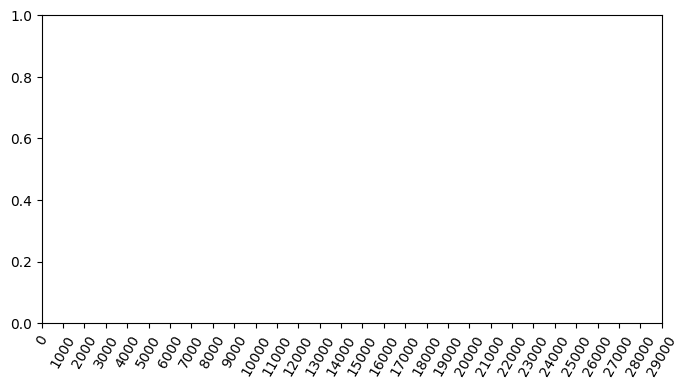

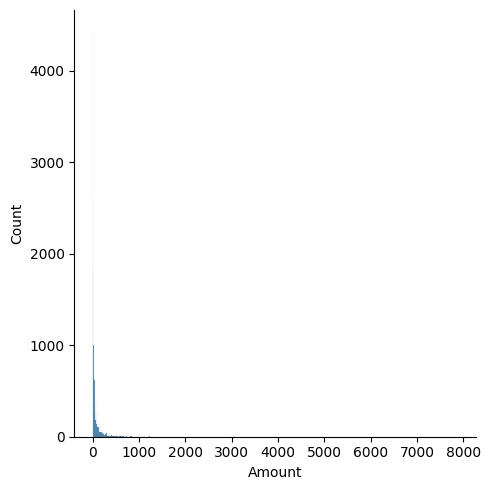

In [13]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.displot(card_df['Amount'])

In [15]:
from sklearn.preprocessing import StandardScaler
#사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  #변환된 Amount를 Amoutn_scaled로 피처명 변경 후 Dataframe맨 앞 컬럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  #기본 Time, Amount 피처 삭제
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [16]:
#amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능
오차 행렬
[[6537    1]
 [   9   17]]
정확도: 0.9985, 정밀도: 0.9444, 재현율: 0.6538,    F1: 0.7727, AUC:0.9202
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 60, number of negative: 15253
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 15313, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003918 -> initscore=-5.538187
[LightGBM] [Info] Start training from score -5.538187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

로그 변환: log1p() 함수 이용

In [17]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  #넘파이의 log1p()를 이용해 Amount를 로그 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy

In [18]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[6535    3]
 [   9   17]]
정확도: 0.9982, 정밀도: 0.8500, 재현율: 0.6538,    F1: 0.7391, AUC:0.9259
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 60, number of negative: 15253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 15313, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003918 -> initscore=-5.538187
[LightGBM] [Info] Start training from score -5.538187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

***이상치 데이터 제거 후 모델/학습/예측/평가***

<Axes: >

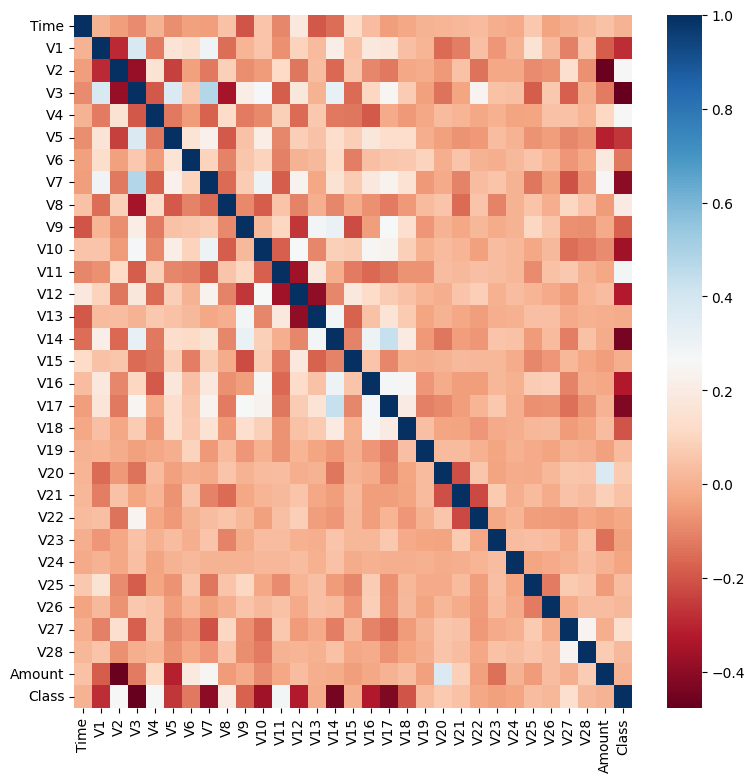

In [19]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [27]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  #fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  #IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [28]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([], dtype='int64')


In [29]:
#get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  #이상치 데이터 삭제하는 로직 추가
  outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test, get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                     tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[6535    3]
 [   9   17]]
정확도: 0.9982, 정밀도: 0.8500, 재현율: 0.6538,    F1: 0.7391, AUC:0.9259


***SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가***

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (15313, 29) (15313,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (30506, 29) (30506,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0.0    15253
1.0    15253
Name: count, dtype: int64


In [35]:
lr_clf = LogisticRegression()
#ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over,
                     tgt_test=y_test)

오차 행렬
[[6505   33]
 [   6   20]]
정확도: 0.9941, 정밀도: 0.3774, 재현율: 0.7692,    F1: 0.5063, AUC:0.8866


In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


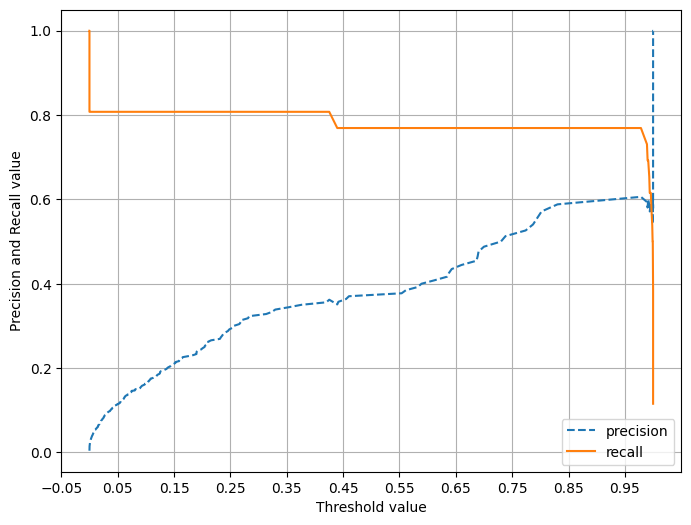

In [38]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [39]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                     tgt_train=y_train_over, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 15253, number of negative: 15253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 30506, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w